In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv("2016_YA_books.csv")
data = data.rename(columns = {"Book title":"title", "Author name":"author", "Star rating":"rating", "Number of reviews":"n_reviews", "Length":"length", "Publisher":"pub"})
data.describe()
data.head()
data.shape
data.head(5)

,title,author,rating,n_reviews,length,pub
0,Mistrust,Margaret McHeyzer,4.5,64,333,Amazon
1,Girl in Pieces,Kathleen Glasgow,4.5,139,418,Delacorte
2,Just Juliet,Charlotte Reagan,4.5,369,224,Inkitt
3,Dork in Love ~ Tales of My Dorky Love Life: Te...,Ann Writes,4.5,9,122,Amazon
4,Warrior Cats: Battle (Warrior Cats (Werecat YA...,Tiyana Angel,5.0,1,52,Guardian Angel Press


In [2]:
#return unique value counts for each col

for col in data.columns:
    uni = np.unique(data[col])
    print(col, np.prod(uni.shape))

title 100
author 96
rating 5
n_reviews 82
length 79
pub 56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6F189D708>,
      dtype=object)

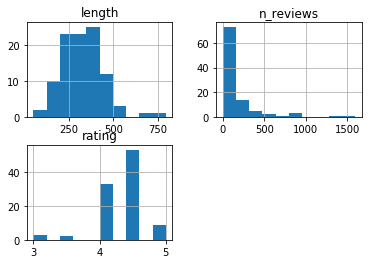

In [3]:
pd.DataFrame(data, columns = ['rating', 'n_reviews', 'length']).hist()

In [4]:
#Normalize variables between 0 & 1
from sklearn.preprocessing import MinMaxScaler
VariableList = ['length']
normVariableName = ['length_norm']

scaler = MinMaxScaler()

for i in range(0,len(data)):
    for j in range(0,len(VariableList)):
        temp = data[VariableList[j]]
        temp1 = temp.values.reshape(-1,1)
        scaler.fit(temp1)
        norm =scaler.transform(temp1)
        data.set_value(i,normVariableName[j],norm[i])
print(data.head())

                                               title             author  \
0                                           Mistrust  Margaret McHeyzer   
1                                     Girl in Pieces   Kathleen Glasgow   
2                                        Just Juliet   Charlotte Reagan   
3  Dork in Love ~ Tales of My Dorky Love Life: Te...         Ann Writes   
4  Warrior Cats: Battle (Warrior Cats (Werecat YA...       Tiyana Angel   

   rating  n_reviews  length                   pub  length_norm  
0     4.5         64     333               Amazon      0.379217  
1     4.5        139     418             Delacorte     0.493927  
2     4.5        369     224                Inkitt     0.232119  
3     4.5          9     122               Amazon      0.094467  
4     5.0          1      52  Guardian Angel Press     0.000000  


C:\Users\v-evtho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\v-evtho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\v-evtho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\v-evtho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\v-evtho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning

In [5]:
#create target variable 'success'
data['success'] = np.where((data['rating'] > 4) & (data['n_reviews']), 1, 0)
data.head(10)

,title,author,rating,n_reviews,length,pub,length_norm,success
0,Mistrust,Margaret McHeyzer,4.5,64,333,Amazon,0.379217,0
1,Girl in Pieces,Kathleen Glasgow,4.5,139,418,Delacorte,0.493927,1
2,Just Juliet,Charlotte Reagan,4.5,369,224,Inkitt,0.232119,1
3,Dork in Love ~ Tales of My Dorky Love Life: Te...,Ann Writes,4.5,9,122,Amazon,0.094467,1
4,Warrior Cats: Battle (Warrior Cats (Werecat YA...,Tiyana Angel,5.0,1,52,Guardian Angel Press,0.000000,1
5,Out of Beat (Boys of Fallout Book 1),Cassandra Giovanni,4.5,11,231,Show not Tell Publishing,0.241565,1
6,A Different Truth,Annette Oppenlander,4.5,25,256,Amazon,0.275304,1
7,Tell Me Three Things,Julie Buxbaum,4.5,218,338,Delacorte,0.385965,0
8,The Fever Code: Book Five,James Dashner,4.5,235,384,Delacorte,0.448043,1
9,The Passion of Dolssa,Julie Berry,4.5,57,496,Viking Books for Young Readers,0.599190,1


In [6]:
# Use textblob to calculate polarity, subjectivity of each title
# and update dataframe 


#https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

nltk.download('vader_lexicon')

#data = data.head(4) #remove

pol_col = []
sub_col = []

for title in data['title']:
    sid = SentimentIntensityAnalyzer()
    sid.polarity_scores(title)
    TextBlob(title).sentiment
    analysisPol = TextBlob(title).polarity
    pol_col.append(analysisPol)
    analysisSub = TextBlob(title).subjectivity
    sub_col.append(analysisSub)

    # Applying the NaiveBayesAnalyzer
    blob_object = TextBlob(title, analyzer=NaiveBayesAnalyzer())
    # Running sentiment analysis
    analysis = blob_object.sentiment
    #print(analysis)

    
data["polarity"] = pol_col
data["subjectivity"] = sub_col
print(data)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\v-evtho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                title                 author  \
0                                            Mistrust      Margaret McHeyzer   
1                                      Girl in Pieces       Kathleen Glasgow   
2                                         Just Juliet       Charlotte Reagan   
3   Dork in Love ~ Tales of My Dorky Love Life: Te...             Ann Writes   
4   Warrior Cats: Battle (Warrior Cats (Werecat YA...           Tiyana Angel   
..                                                ...                    ...   
95                                        Shining Sea             Mimi Cross   
96                                    Defying Gravity      Kendra C. Highley   
97                                Julie of the Wolves  Jean Craighead George   
98                                        Blackhearts       Nicole Castroman   
99                                    Prom Ever After            Dona Sarkar   

    rating  n_reviews  length          

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6F1DB8088>,
      dtype=object)

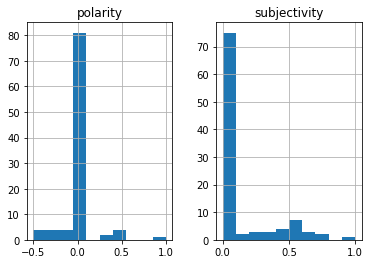

In [7]:
# Encode publisher column
data_safe = data
#data = data_safe
data_safe.shape
pd.DataFrame(data, columns = ['polarity', 'subjectivity']).hist()

In [8]:
'''
# model linear

X = data[['length', 'polarity', 'subjectivity', 'pub']]
Y = data['success']

X = pd.get_dummies(data=X, drop_first=True) #conver categorical variable 'pub' into dummies, drop one col to avoid multicol

from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

print(predicted)
'''

"\n# model linear\n\nX = data[['length', 'polarity', 'subjectivity', 'pub']]\nY = data['success']\n\nX = pd.get_dummies(data=X, drop_first=True) #conver categorical variable 'pub' into dummies, drop one col to avoid multicol\n\nfrom sklearn import linear_model\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)\nregr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding\nregr.fit(X_train, Y_train)\npredicted = regr.predict(X_test)\n\nprint(predicted)\n"

In [9]:
# split data

X = data[['length_norm', 'polarity', 'subjectivity', 'pub']]
Y = data['success']

X = pd.get_dummies(data=X, drop_first=True) #conver categorical variable 'pub' into dummies, drop one col to avoid multicol

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80, 58)
(80,)
(20, 58)
(20,)


In [15]:
# model
from sklearn import linear_model
from sklearn.metrics import accuracy_score

regr = linear_model.LogisticRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

data_test = pd.concat([X_test, Y_test], axis = 1, sort = False)
data_test["predicted"] = predicted
data_test.shape
print(data_test.head())

score = accuracy_score(data_test["success"],data_test["predicted"])
print("Accuracy: ",score)

    length_norm  polarity  subjectivity  pub_Amulet Books  \
79     0.392713     0.075      0.216667                 0   
75     0.385965     0.000      0.000000                 0   
63     0.323887     0.000      0.100000                 0   
15     0.192982     0.000      0.000000                 0   
38     0.234818     0.000      0.000000                 0   

    pub_Amy Sparling Books  pub_Another World Press  \
79                       0                        0   
75                       0                        0   
63                       0                        0   
15                       0                        0   
38                       0                        0   

    pub_Atheneum/Caitlyn Dlouhy Books  pub_BLVNP Incorporated  \
79                                  0                       0   
75                                  0                       0   
63                                  0                       0   
15                                  0     

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data_test["success"],data_test["predicted"])
data_test.loc[:,['success', 'predicted']]

array([[13,  0],
       [ 7,  0]], dtype=int64)

In [25]:
# analyze training outcomes

predicted_train = regr.predict(X_train)

data_train = pd.concat([X_train, Y_train], axis = 1, sort = False)
data_train["predicted"] = predicted_train
data_train.shape
#print(data_train.head())

score = accuracy_score(data_train["success"],data_train["predicted"])
#print("Accuracy: ",score)
print(confusion_matrix(data_train["success"],data_train["predicted"]))

print("Training outcomes (80 obs): ")
print(data_train.loc[:,['success', 'predicted']])


[[51  1]
 [17 11]]
Training outcomes (80 obs): 
    success  predicted
72        1          1
66        1          1
69        0          0
67        0          0
26        0          0
..      ...        ...
56        0          0
37        0          0
7         0          1
91        1          0
70        0          0

[80 rows x 2 columns]


In [12]:
'''
# simple linear model w 2 variables
import matplotlib.pyplot as plt

#split
data_num = data[['length', 'rating']]
X = data_num.iloc[:,:-1].values  #independent variable array
y = data_num.iloc[:,1].values  #dependent variable vector

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

#fit model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data

#predict
y_pred = regressor.predict(X_test) 
y_pred



#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Page Count vs Rating (Testing set)")
 
plt.xlabel("Page Count") 
plt.ylabel("Rating") 
plt.show() 
'''

'\n# simple linear model w 2 variables\nimport matplotlib.pyplot as plt\n\n#split\ndata_num = data[[\'length\', \'rating\']]\nX = data_num.iloc[:,:-1].values  #independent variable array\ny = data_num.iloc[:,1].values  #dependent variable vector\n\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)\n\n#fit model\nfrom sklearn.linear_model import LinearRegression\nregressor = LinearRegression()\nregressor.fit(X_train,y_train) #actually produces the linear eqn for the data\n\n#predict\ny_pred = regressor.predict(X_test) \ny_pred\n\n\n\n#plot for the TEST\n \nplt.scatter(X_test, y_test, color=\'red\') \nplt.plot(X_train, regressor.predict(X_train), color=\'blue\') # plotting the regression line\n \nplt.title("Page Count vs Rating (Testing set)")\n \nplt.xlabel("Page Count") \nplt.ylabel("Rating") \nplt.show() \n'

35